# Market Volatility Predictor - Optiver (Kaggle Competition)

## Research

* What is Volatility?

* Why is predicting volatility important?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
import pyarrow.parquet as pq
import pyarrow as pa

In [2]:
train = pd.read_csv('data/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428932 entries, 0 to 428931
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stock_id  428932 non-null  int64  
 1   time_id   428932 non-null  int64  
 2   target    428932 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 9.8 MB


In [5]:
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [11]:
book_train = pq.read_table('data/book_train.parquet')

In [12]:
book_df = book_train.to_pandas()

In [13]:
book_df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [14]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167253289 entries, 0 to 167253288
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   time_id            int16   
 1   seconds_in_bucket  int16   
 2   bid_price1         float32 
 3   ask_price1         float32 
 4   bid_price2         float32 
 5   ask_price2         float32 
 6   bid_size1          int32   
 7   ask_size1          int32   
 8   bid_size2          int32   
 9   ask_size2          int32   
 10  stock_id           category
dtypes: category(1), float32(4), int16(2), int32(4)
memory usage: 5.8 GB


<AxesSubplot:xlabel='time_id'>

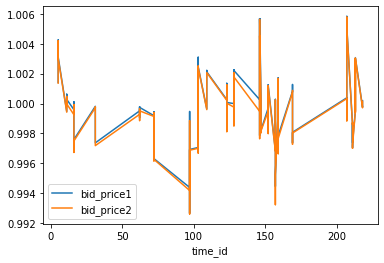

In [21]:
book_df[['time_id', 'bid_price1', 'bid_price2']].set_index('time_id').iloc[:5000].plot()